## Analysis of multivariate data - NHANES case study

In this notebook, we illustrate several basic techniques for exploring data using methods for understanding multivariate relationships.  The statistical methods discussed here will parallel the methods discussed in the multivariate methods section of the course, and build on the univariate analysis discussed earlier.  As with the univariate notebook, we use here the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study for illustration.

Many of the analyses presented in this notebook use the Matplotlib and Seaborn libraries for data visualization.  These are very powerful tools that give you a vast number of options when constructing plots.  We will not explain every option to every function in the examples below. You can use the [Matplotlib](https://matplotlib.org/users/index.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html) documentation to fully understand the options, and you can experiment with these and other plots on your own to get a better sense of what can be done.   

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_rows', 500)

In [4]:
da = pd.read_csv('nhanes_2015_2016.csv')

### Quantitative bivariate data

Bivariate data arise when every "unit of analysis" (e.g. a person in the NHANES dataset) is assessed with respect to two traits (the NHANES subjects were assessed for many more than two traits, but we can consider two traits at a time here).  

A scatterplot is a very common and easily-understood visualization of quantitative bivariate data.  Below we make a scatterplot of arm length against leg length.  This means that arm length ([BMXARML](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXARML)) is plotted on the vertical axis and leg length ([BMXLEG](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXLEG)) is plotted on the horizontal axis).  We see a positive dependence between the two measures -- people with longer arms tend to have longer legs, and vice-versa.  However it is far from a perfect relationship.

In a scatterplot with more than around 100 points, "overplotting" becomes an issue.  This means that many points fall on top of each other in the plot, which obscures relationships in the middle of the distribution and over-emphasizes the extremes.  One way to mitigate overplotting is to use an "alpha" channel to make the points semi-transparent, as we have done below.

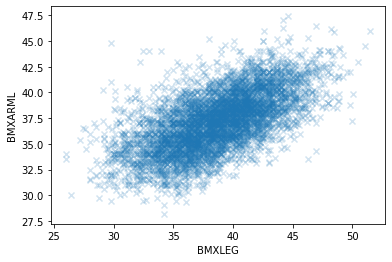

In [6]:
#fit_reg - True if you want the line
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg = False, scatter_kws={"alpha": 0.2}, marker = 'x')

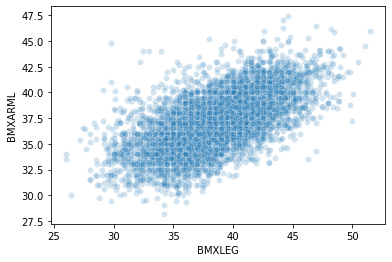

In [7]:
sns.scatterplot(x="BMXLEG", y=("BMXARML"), data=da, alpha = 0.2)

Another way to avoid overplotting is to make a plot of the "density" of points.  In the plots below, darker colors indicate where a greater number of points fall.  The two plot margins show the densities for the arm lengths and leg lengths separately, while the plot in the center shows their density jointly.

This plot also shows the Pearson correlation coefficient between the arm length and leg length, which is 0.62.  As discussed in the course, the Pearson correlation coefficient ranges from -1 to 1, with values approaching 1 indicating a more perfect positive dependence.  In many settings, a correlation of 0.62 would be considered a moderately strong positive dependence. 

### Ways to better visualize a great number of points

**[Joint Plot Documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)**

F:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


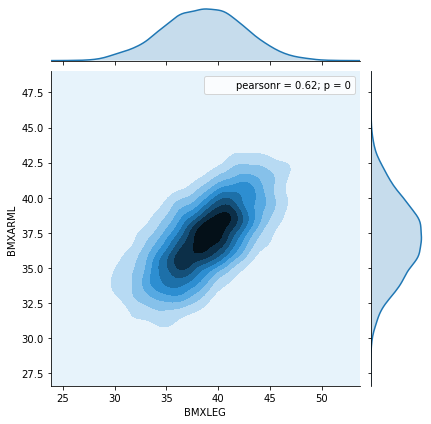

In [78]:
g = sns.jointplot(x="BMXLEG", y="BMXARML", kind = 'kde', data=da).annotate(stats.pearsonr)

F:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
F:\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'fill'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


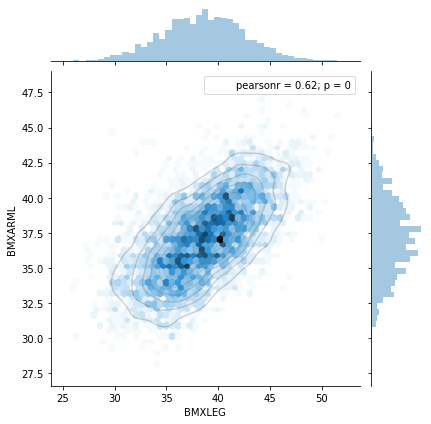

In [9]:
g = sns.jointplot(x="BMXLEG", y="BMXARML", kind = 'hex', data=da).annotate(stats.pearsonr)
g.plot_joint(sns.kdeplot, alpha = 0.2 , fill = False)
plt.show()

F:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


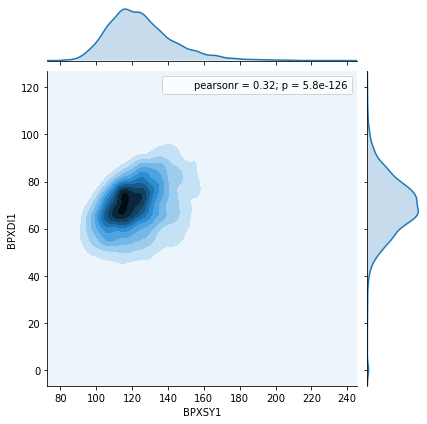

In [10]:
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da).annotate(stats.pearsonr)

Next we look at two repeated measures of systolic blood pressure, taken a few minutes apart on the same person.  These values are very highly correlated, with a correlation coefficient of around 0.96.

F:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


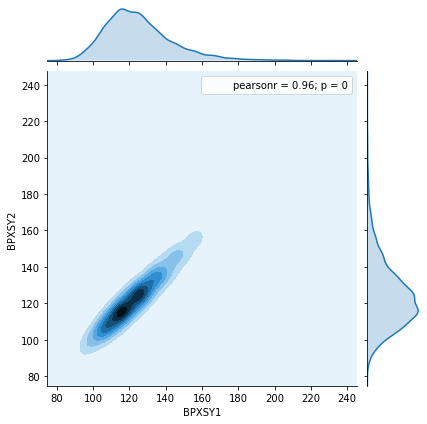

In [89]:
#ignore deprecation warning message
jp = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da).annotate(stats.pearsonr)

Two ways to create table of counts.

1 - group, count and unstack

2 - crosstab :)

In [11]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

In [12]:
dx = db.loc[: , ['DMDEDUC2x', 'DMDMARTLx']]

In [13]:
dx.groupby('DMDEDUC2x')['DMDMARTLx'].value_counts().unstack()

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [14]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [15]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


We can also normalize within the columns instead of normalizing within the rows. This gives us the proportion of people with each marital status group who have each level of educational attainment.

In [16]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


It is quite plausible that there are gender differences in the relationship between educational attainment and marital status. Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables. This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [17]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 


#### Cross tab

In [18]:
x = pd.crosstab([da.RIAGENDRx, da.DMDEDUC2x], da.DMDMARTLx).apply(lambda x: x/sum(x), axis = 1)
x

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148515          0.099010  0.418042   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115169          0.102528  0.529494   

DMDMARTLx                  Never married   Refused  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                                      
Female    9-11                  0.171821  0.000000   0.075601  0.103093  
          <9                    0.108883  0.000000   0.088825  0.194842  
          College               0.182706  0.000000   0.016736  0.057183  
          Don't know            0.000000  0.000000   0.000000  1.000000  
          HS/GED                0.188679  0.000000   0.041166  0.125214  
          Some college/AA       0.210121  0.001100   0.031903  0.091309  
Male      9-11                  0.190341  0.000000   0.048295  0.028409  
          <9                    0.088235  0.000000   0.039216  0.065359  
          College               0.187982  0.000000   0.015408  0.027735  
          Don't know            0.000000  0.000000   0.000000  0.500000  
          HS/GED                0.210614  0.000000   0.026534  0.043118  
          Some college/AA       0.198034  0.001404   0.018258  0.035112

#### Groupby

In [19]:
da.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148515          0.099010  0.418042   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115169          0.102528  0.529494   

DMDMARTLx                  Never married   Refused  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                                      
Female    9-11                  0.171821  0.000000   0.075601  0.103093  
          <9                    0.108883  0.000000   0.088825  0.194842  
          College               0.182706  0.000000   0.016736  0.057183  
          Don't know            0.000000  0.000000   0.000000  1.000000  
          HS/GED                0.188679  0.000000   0.041166  0.125214  
          Some college/AA       0.210121  0.001100   0.031903  0.091309  
Male      9-11                  0.190341  0.000000   0.048295  0.028409  
          <9                    0.088235  0.000000   0.039216  0.065359  
          College               0.187982  0.000000   0.015408  0.027735  
          Don't know            0.000000  0.000000   0.000000  0.500000  
          HS/GED                0.210614  0.000000   0.026534  0.043118  
          Some college/AA       0.198034  0.001404   0.018258  0.035112

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men.  To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried"  This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.

There are a number of intriguing results here.  For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men).  However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample).  There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

In [20]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

In [49]:
dx = da.loc[(da.RIDAGEYR >= 40) & (da.RIDAGEYR < 50)] #select the age interval I'm interested in
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

**Equivalent options**
    
dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size() and dx.groupby(["RIAGENDRx",'DMDEDUC2x','DMDMARTLx']).RIAGENDRx.value_counts()

Nevertheless, the second renders a column less and is more efficient. Size() is a numpy function that counts the size of an array, or pd Series.

In [44]:
dx = da.loc[(da.RIDAGEYR >= 50) & (da.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

In [71]:
print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack()) #unstack is better to visualize

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


### Mixed categorical and quantitative data

Another situation that commonly arises in data analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. To illustrate methods that can be used in this setting, we consider the relationship between marital status and age in the NHANES data.  Specifically, we consider the distribution of ages for people who are currently in each marital status category.  A natural tool in this setting is side-by-side boxplots.  Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger.

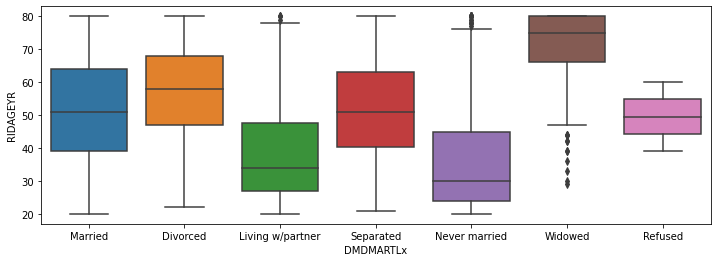

In [76]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(da.DMDMARTLx, da.RIDAGEYR)

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot. The violinplot below is based on the same data as the boxplot above. We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed. The other distributions have intermediate mean values, and are approximately symmetrically distributed. Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

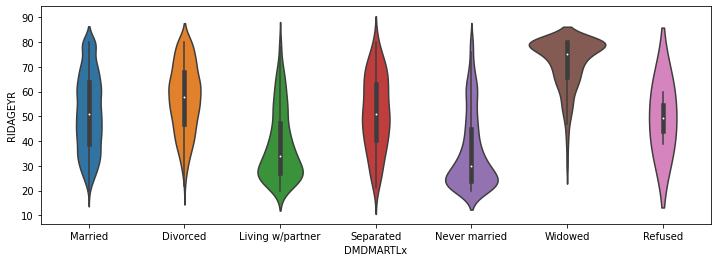

In [77]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.DMDMARTLx, da.RIDAGEYR)